# Atlanta Crime Rates 2017
#### By: Emmanuel Muse

For this side project, I wanted to focus on Atlanta crime rates to better determine how crime occurs across Atlanta, and to improve the general public of Atlanta's knowledge and answer any safety concerns.

I utilized the Atlanta Police Department's dataset from 2017. The data consisted of information about the offense, the report date, occurance time and date, and possession time and date. It also included the location, number of maximum victims, shift day, day of the weekm location type, crime type, neighborhood, and coordinates of each crime reported.

## Importing Libraries and Data

Import pandas, numpy, plotly and matplotlib libraries

In [456]:
import pandas as pd
import numpy as np
import plotly.express as plty
import matplotlib.pyplot as plt

Enable IPython to display matplotlib graphs.

In [457]:
%matplotlib inline
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

Insert Atlanta Crime Rate 2017 from CSV file

In [458]:
crime_data = pd.read_csv("atl_crime_2017.csv", parse_dates=['rpt_date','occur_date','poss_date'], index_col = 0)
crime_data.head()

,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,location,...,dispo_code,MaxOfnum_victims,Shift,Avg_Day,loc_type,UC2 Literal,neighborhood,npu,x,y
MI_PRINX,,,,,,,,,,,,,,,,,,,,,
8924155,173650072.0,2017-12-31,2017-12-30,23:15:00,2017-12-31,0:30:00,510,NaN,NaN,43 JESSE HILL JR DR NE,...,NaN,2.0,Morn,Sat,13.0,LARCENY-FROM VEHICLE,Downtown,M,-84.38013,33.75582
8924156,173650102.0,2017-12-31,2017-12-18,13:00:00,2017-12-30,22:00:00,501,NaN,NaN,1169 ATLANTIC DR NW,...,NaN,1.0,Unk,Unk,13.0,LARCENY-FROM VEHICLE,Home Park,E,-84.39745,33.78674
8924157,173650144.0,2017-12-31,2017-12-30,22:01:00,2017-12-31,1:00:00,303,NaN,NaN,633 PRYOR ST SW,...,NaN,1.0,Morn,Sat,18.0,LARCENY-FROM VEHICLE,Mechanicsville,V,-84.39486,33.73760
8924158,173650149.0,2017-12-31,2017-12-30,20:00:00,2017-12-31,1:06:00,507,NaN,NaN,333 NELSON ST SW,...,NaN,1.0,Eve,Sat,18.0,LARCENY-FROM VEHICLE,Castleberry Hill,M,-84.39887,33.75156
8924159,173650159.0,2017-12-31,2017-12-31,0:41:00,2017-12-31,0:48:00,409,NaN,NaN,2348 CASCADE RD SW,...,NaN,2.0,Morn,Sun,18.0,LARCENY-FROM VEHICLE,Adams Park,R,-84.46522,33.72146


Imported data information

In [4]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26759 entries, 8924155 to 8897600
Data columns (total 22 columns):
offense_id           26759 non-null float64
rpt_date             26759 non-null datetime64[ns]
occur_date           26759 non-null datetime64[ns]
occur_time           26748 non-null object
poss_date            26759 non-null datetime64[ns]
poss_time            26755 non-null object
beat                 26759 non-null int64
apt_office_prefix    546 non-null object
apt_office_num       4626 non-null object
location             26759 non-null object
MinOfucr             26759 non-null int64
MinOfibr_code        26758 non-null object
dispo_code           3800 non-null object
MaxOfnum_victims     26684 non-null float64
Shift                26759 non-null object
Avg_Day              26759 non-null object
loc_type             23415 non-null float64
UC2 Literal          26759 non-null object
neighborhood         25574 non-null object
npu                  26499 non-null object
x 

## Manipulating the Data

In order to separate the data by month, day, and year from the report date, three new variable needed to be created. 
All "Unk" in data will not be included

In [5]:
crime_data['rpt_year'] = crime_data['rpt_date'].dt.year
crime_data['rpt_month'] = crime_data['rpt_date'].dt.month
crime_data['rpt_day'] = crime_data['rpt_date'].dt.day

In [6]:
crime_data = crime_data[crime_data.Shift != 'Unk']
crime_data = crime_data[crime_data.Avg_Day != 'Unk']
crime_data.head()

,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,location,...,Avg_Day,loc_type,UC2 Literal,neighborhood,npu,x,y,rpt_year,rpt_month,rpt_day
MI_PRINX,,,,,,,,,,,,,,,,,,,,,
8924155,173650072.0,2017-12-31,2017-12-30,23:15:00,2017-12-31,0:30:00,510,NaN,NaN,43 JESSE HILL JR DR NE,...,Sat,13.0,LARCENY-FROM VEHICLE,Downtown,M,-84.38013,33.75582,2017,12,31
8924157,173650144.0,2017-12-31,2017-12-30,22:01:00,2017-12-31,1:00:00,303,NaN,NaN,633 PRYOR ST SW,...,Sat,18.0,LARCENY-FROM VEHICLE,Mechanicsville,V,-84.39486,33.73760,2017,12,31
8924158,173650149.0,2017-12-31,2017-12-30,20:00:00,2017-12-31,1:06:00,507,NaN,NaN,333 NELSON ST SW,...,Sat,18.0,LARCENY-FROM VEHICLE,Castleberry Hill,M,-84.39887,33.75156,2017,12,31
8924159,173650159.0,2017-12-31,2017-12-31,0:41:00,2017-12-31,0:48:00,409,NaN,NaN,2348 CASCADE RD SW,...,Sun,18.0,LARCENY-FROM VEHICLE,Adams Park,R,-84.46522,33.72146,2017,12,31
8924160,173650180.0,2017-12-31,2017-12-30,23:00:00,2017-12-31,1:26:00,612,NaN,NaN,1245 GLENWOOD AVE SE,...,Sun,18.0,LARCENY-FROM VEHICLE,East Atlanta,W,-84.34660,33.74006,2017,12,31


## Graph #1: Maximum Number of Victims Affected Per Crime Type

Two columns were kept for the first graph. The type of crime, 'UC2 Literal', and the maximum number of victims. They were added to a new variable, "crimePerMonth."

In [7]:
victims_crime = crime_data[['UC2 Literal','MaxOfnum_victims']]
victims_crime.head()

,UC2 Literal,MaxOfnum_victims
MI_PRINX,,
8924155,LARCENY-FROM VEHICLE,2.0
8924157,LARCENY-FROM VEHICLE,1.0
8924158,LARCENY-FROM VEHICLE,1.0
8924159,LARCENY-FROM VEHICLE,2.0
8924160,LARCENY-FROM VEHICLE,1.0


crimePerMonth is grouped by the type of crime in crime_group.

In [8]:
victims_group=victims_crime.groupby(['UC2 Literal'])
victims_group.size()

UC2 Literal
AGG ASSAULT             1956
AUTO THEFT              2717
BURGLARY-NONRES          558
BURGLARY-RESIDENCE      1946
HOMICIDE                  69
LARCENY-FROM VEHICLE    8740
LARCENY-NON VEHICLE     5487
RAPE                     167
ROBBERY-COMMERCIAL       157
ROBBERY-PEDESTRIAN      1119
ROBBERY-RESIDENCE        128
dtype: int64

The sum function is used to retrieve the total number of victims affected per type of crime. Then, sorted in descending order by maximum number of victims affected.

In [9]:
total_victims = victims_group.sum()
total_victims.sort_values(by='MaxOfnum_victims',ascending=False).head()

,MaxOfnum_victims
UC2 Literal,
LARCENY-FROM VEHICLE,11164.0
LARCENY-NON VEHICLE,5675.0
AUTO THEFT,2844.0
AGG ASSAULT,2520.0
BURGLARY-RESIDENCE,2215.0


In [10]:
total_victims.describe()

,MaxOfnum_victims
count,11.000000
mean,2454.818182
std,3351.072778
min,0.000000
25%,214.000000
50%,1383.000000
75%,2682.000000
max,11164.000000


A bar chart plot is created to show that more victims were affected by 'Larceny- From Vehicle.' The least amount of victims were affected by 'Homicide.'

Text(0, 0.5, 'Maximum Number of Victims')

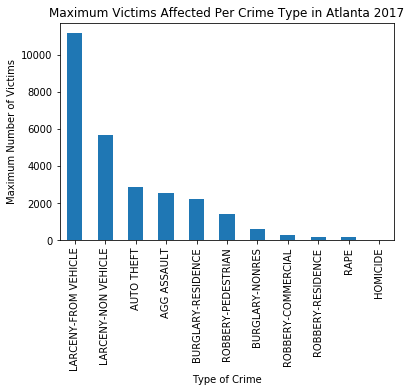

In [11]:
victims_plot = total_victims.sort_values(by='MaxOfnum_victims',ascending=False).plot(kind='bar',legend=None,title="Maximum Victims Affected Per Crime Type in Atlanta 2017")
victims_plot.set_xlabel("Type of Crime")
victims_plot.set_ylabel("Maximum Number of Victims")

In the first graph, 11,164 victims were affected from larceny from a vehicle in Atlanta 2017. No victims were affected in a homicide.

## Graph #2: Max Victims Affected By Day

Breakdown the type of crime by 'Shift' day and 'Avg_Day'. This will inform us when time of day and day of the week the crimes occured.

In [14]:
victims = crime_data[['UC2 Literal','MaxOfnum_victims', 'Shift', 'Avg_Day','rpt_month']]
victims.dropna(subset=['Shift'])
victims.head()

,UC2 Literal,MaxOfnum_victims,Shift,Avg_Day,rpt_month
MI_PRINX,,,,,
8924155,LARCENY-FROM VEHICLE,2.0,Morn,Sat,12
8924157,LARCENY-FROM VEHICLE,1.0,Morn,Sat,12
8924158,LARCENY-FROM VEHICLE,1.0,Eve,Sat,12
8924159,LARCENY-FROM VEHICLE,2.0,Morn,Sun,12
8924160,LARCENY-FROM VEHICLE,1.0,Morn,Sun,12


Groupby is used to organize the data into the Shift, day of the week, and month reported of crime.

In [15]:
victims_breakdown = victims.groupby(['Shift', 'Avg_Day','rpt_month']).sum()
victims_breakdown.head()

MaxOfnum_victims
Shift Avg_Day rpt_month                  
Day   Fri     1                      72.0
              2                      84.0
              3                      89.0
              4                      57.0
              5                      87.0

To graph the data as a stacked bar graph, it must be unstacked first.

In [16]:
victims_breakdown.unstack()

MaxOfnum_victims                                            \
rpt_month                   1      2      3      4      5      6      7    
Shift Avg_Day                                                              
Day   Fri                 72.0   84.0   89.0   57.0   87.0  110.0   86.0   
      Mon                125.0   85.0   65.0   76.0  121.0   94.0  144.0   
      Sat                 81.0   55.0   65.0   93.0   67.0   60.0  127.0   
      Sun                 79.0   48.0   43.0   89.0   70.0   66.0   80.0   
      Thu                 73.0   71.0   71.0  103.0  102.0  111.0   87.0   
      Tue                115.0   75.0   60.0   82.0  111.0   94.0   78.0   
      Wed                 91.0   67.0   89.0   85.0  117.0   90.0  117.0   
Eve   Fri                125.0  106.0  149.0  151.0  125.0  118.0  109.0   
      Mon                138.0  126.0   67.0  112.0  143.0   91.0  157.0   
      Sat                105.0   96.0   99.0  129.0  118.0  112.0  161.0   
      Sun                133.0  116.0   83.0  103.0  128.0   93.0  126.0   
      Thu                 86.0  121.0   95.0  116.0  122.0  123.0  125.0   
      Tue                168.0  106.0   94.0  103.0  143.0  138.0  111.0   
      Wed                131.0   98.0  113.0  111.0  133.0  120.0  107.0   
Morn  Fri                 74.0   59.0   62.0  100.0   83.0  123.0   86.0   
      Mon                115.0   91.0   68.0   82.0  125.0   84.0  103.0   
      Sat                101.0   90.0   74.0  130.0  111.0  117.0  113.0   
      Sun                133.0  102.0   71.0  141.0  109.0  150.0  153.0   
      Thu                 82.0   77.0   76.0   74.0   81.0  124.0   96.0   
      Tue                 89.0   71.0   60.0   74.0  136.0   96.0  137.0   
      Wed                 84.0   67.0   70.0   81.0  104.0   79.0  125.0   

                                                  
rpt_month         8      9      10     11     12  
Shift Avg_Day                                     
Day   Fri      104.0  113.0   73.0  101.0  118.0  
      Mon       82.0  102.0  131.0  101.0   76.0  
      Sat       94.0  119.0  125.0   89.0   97.0  
      Sun       86.0   79.0   95.0   91.0  107.0  
      Thu      113.0   94.0   97.0  101.0  111.0  
      Tue       98.0  101.0  113.0  111.0   84.0  
      Wed      100.0   94.0   81.0  142.0  101.0  
Eve   Fri      121.0  148.0  136.0  179.0  152.0  
      Mon      108.0  123.0  166.0  139.0  103.0  
      Sat      150.0  175.0  179.0  134.0  152.0  
      Sun      115.0  128.0  229.0  115.0  172.0  
      Thu      135.0  128.0  120.0  148.0  180.0  
      Tue      125.0  140.0  156.0  144.0  137.0  
      Wed      132.0  139.0  143.0  166.0  162.0  
Morn  Fri       72.0  105.0  104.0   83.0  104.0  
      Mon      101.0  118.0  108.0   77.0   67.0  
      Sat      123.0  153.0  108.0  119.0  128.0  
      Sun      123.0  133.0  139.0  118.0  121.0  
      Thu       91.0   88.0   75.0  101.0   87.0  
      Tue      111.0   97.0  128.0   89.0  106.0  
      Wed      108.0   91.0  116.0  117.0   68.0

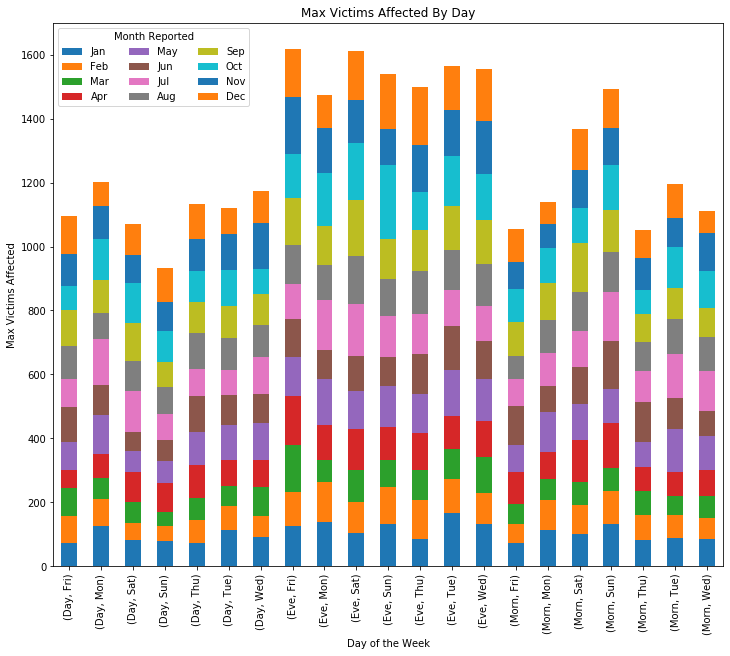

In [18]:
breakdown_plot = victims_breakdown.unstack().plot(kind='bar',stacked=True,title="Max Victims Affected By Day",figsize=(12, 10))
breakdown_plot.set_xlabel("Day of the Week")
breakdown_plot.set_ylabel("Max Victims Affected")
breakdown_plot.legend(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], title="Month Reported", loc=2,ncol=3)

In the second graph, most victims were affected on Friday evenings during the months of March and Novemeber. On Saturday evenings during the months of September and October.

## Graph #3:  Atlanta Crime Type Frequency

We need to find the correlation between type of crime and frequency

In [19]:
crime = crime_data['UC2 Literal']
summary = crime.value_counts(sort = True).to_frame()
summary = summary.reset_index()
summary.columns = ['Crime Type', 'Frequency']
summary

,Crime Type,Frequency
0,LARCENY-FROM VEHICLE,8740
1,LARCENY-NON VEHICLE,5487
2,AUTO THEFT,2717
3,AGG ASSAULT,1956
4,BURGLARY-RESIDENCE,1946
5,ROBBERY-PEDESTRIAN,1119
6,BURGLARY-NONRES,558
7,RAPE,167
8,ROBBERY-COMMERCIAL,157
9,ROBBERY-RESIDENCE,128


Convert new variable "summary" into an array to create a bar chart

In [20]:
crime_type = np.array(summary['Crime Type'])
crime_freq = np.array(summary['Frequency'])
crime_type
crime_freq

array([8740, 5487, 2717, 1956, 1946, 1119,  558,  167,  157,  128,   69])

Create bar chart

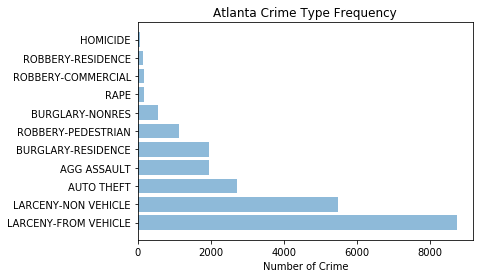

In [21]:
plt.barh(crime_type, crime_freq, alpha =0.5)
plt.xlabel('Number of Crime')
plt.title('Atlanta Crime Type Frequency')
plt.show()

In [22]:
summary.describe()

,Frequency
count,11.000000
mean,2094.909091
std,2735.906302
min,69.000000
25%,162.000000
50%,1119.000000
75%,2336.500000
max,8740.000000


On the third graph: 
    Crime with highest freyquency: Larceny - From Vehicle at 8740
    Crime with highest freyquency: Homicide at 69

## Graph #4: Frequency of Crimes By Day

We want to find the day of the week with the most crime

In [24]:
date = crime_data['Avg_Day']
date_count = date.value_counts(sort = True).to_frame()
date_count = date_count.reset_index()
date_count.columns = ['Date Type', 'No of Crime']
date_count

,Date Type,No of Crime
0,Sat,3439
1,Wed,3324
2,Tue,3317
3,Mon,3266
4,Sun,3261
5,Fri,3225
6,Thu,3212


Convert the data into an array for bar chart

In [25]:
date_type = np.array(date_count['Date Type'])
crime_no = np.array(date_count['No of Crime'])

Create bar chart

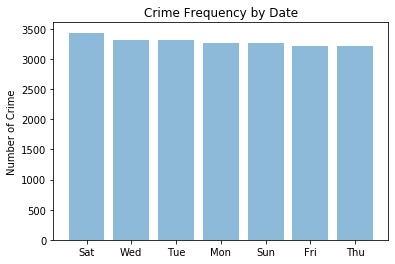

In [26]:
plt.bar(date_type,crime_no, alpha =0.5)
plt.ylabel('Number of Crime')
plt.title('Crime Frequency by Date')
plt.show()

In 4th chart:
    Crime happens the most on Saturday
    Crime happens least on Thursday

## Graph #5: Percentage of Crimes Per Day

Show columns in dataframe

In [27]:
crime_data.columns
for col in crime_data.columns:
    print(col)

offense_id
rpt_date
occur_date
occur_time
poss_date
poss_time
beat
apt_office_prefix
apt_office_num
location
MinOfucr
MinOfibr_code
dispo_code
MaxOfnum_victims
Shift
Avg_Day
loc_type
UC2 Literal
neighborhood
npu
x
y
rpt_year
rpt_month
rpt_day


In [28]:
atl_crime_pd = pd.DataFrame(crime_data)
atl_crime_pd.columns

Index(['offense_id', 'rpt_date', 'occur_date', 'occur_time', 'poss_date',
       'poss_time', 'beat', 'apt_office_prefix', 'apt_office_num', 'location',
       'MinOfucr', 'MinOfibr_code', 'dispo_code', 'MaxOfnum_victims', 'Shift',
       'Avg_Day', 'loc_type', 'UC2 Literal', 'neighborhood', 'npu', 'x', 'y',
       'rpt_year', 'rpt_month', 'rpt_day'],
      dtype='object')

In [29]:
atl_crime_pd.rename(columns= {'Avg_Day':'Day of Week','Shift':'Day or Night' ,'neighborhood':'Neighborhood', 'UC2 Literal':'Type of Crime'}, inplace=True)

In [30]:
for col in atl_crime_pd.columns:
    print(col)

offense_id
rpt_date
occur_date
occur_time
poss_date
poss_time
beat
apt_office_prefix
apt_office_num
location
MinOfucr
MinOfibr_code
dispo_code
MaxOfnum_victims
Day or Night
Day of Week
loc_type
Type of Crime
Neighborhood
npu
x
y
rpt_year
rpt_month
rpt_day


## Graph #6: "Crime Frequency Distribution By Day" Bar Graph

In [158]:
#create series grouped by frequency of days together from the 'atl_crime_pd' dataframe's column 'Day of Week'
days_freq = atl_crime_pd.groupby(['Day of Week']).size()
days_freq

Day of Week
Fri    3225
Mon    3266
Sat    3439
Sun    3261
Thu    3212
Tue    3317
Wed    3324
dtype: int64

In [159]:
#convert single dimension 'days_freq' series, to multi-dimensional 'days_freq' dataframe and reset index
days_freq = days_freq.to_frame().reset_index()
days_freq

,Day of Week,0
0,Fri,3225
1,Mon,3266
2,Sat,3439
3,Sun,3261
4,Thu,3212
5,Tue,3317
6,Wed,3324


In [164]:
#Changing the order of the day index to be chronologically sorted Monday to Sunday
days_freq.set_axis([4,0,5,6,3,1,2], inplace=True)
days_freq

,Day,Freq
4,Fri,3225
0,Mon,3266
5,Sat,3439
6,Sun,3261
3,Thu,3212
1,Tue,3317
2,Wed,3324


In [165]:
#Rename column 'Day of Week' to 'Day' and column '0' to 'Freq' in new days_freq dataframe
days_freq.columns = ['Day', 'Freq']
days_freq

,Day,Freq
4,Fri,3225
0,Mon,3266
5,Sat,3439
6,Sun,3261
3,Thu,3212
1,Tue,3317
2,Wed,3324


In [166]:
#sorted dataframe by index to have dataframe now be in chronological order by day
days_freq = days_freq.sort_index()
days_freq

,Day,Freq
0,Mon,3266
1,Tue,3317
2,Wed,3324
3,Thu,3212
4,Fri,3225
5,Sat,3439
6,Sun,3261


In [191]:
fig = plty.bar(days_freq, x='Day', y='Freq', color='Freq', text='Freq')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', textfont_size=16, marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

## Graph #7: Crime Frequency Distribution By Day Pie Graph

In [233]:
fig = plty.pie(days_freq, values='Freq', names='Day', title='Crime Frequency Distribution By Day')
fig.update_traces(textposition='inside', textinfo='percent+label',
                  textfont_size=16, marker=dict(line=dict(color='#000000', width=2)))
fig.show()

## Graph #8 and #9: Type of Crime/Day Frequency Distribution Sunburst Graphs

In [438]:
"""Using groupby to group columns 'Type of Crime' and 'Day of Week'... 
for finding the frequency of the crime types during days of the week...
then converting the series produced to a dataframe for handling
"""
crime_type_day_freq = atl_crime_pd.groupby(['Type of Crime', 'Day of Week']).size()
crime_type_day_freq

Type of Crime      Day of Week
AGG ASSAULT        Fri            278
                   Mon            270
                   Sat            300
                   Sun            341
                   Thu            247
                                 ... 
ROBBERY-RESIDENCE  Sat             11
                   Sun             26
                   Thu             17
                   Tue             24
                   Wed             16
Length: 77, dtype: int64

In [439]:
crime_type_day_freq = crime_type_day_freq.to_frame().reset_index()
crime_type_day_freq

,Type of Crime,Day of Week,0
0,AGG ASSAULT,Fri,278
1,AGG ASSAULT,Mon,270
2,AGG ASSAULT,Sat,300
3,AGG ASSAULT,Sun,341
4,AGG ASSAULT,Thu,247
...,...,...,...
72,ROBBERY-RESIDENCE,Sat,11
73,ROBBERY-RESIDENCE,Sun,26
74,ROBBERY-RESIDENCE,Thu,17
75,ROBBERY-RESIDENCE,Tue,24


In [440]:
crime_type_day_freq.columns

Index(['Type of Crime', 'Day of Week', 0], dtype='object')

In [441]:
#Renamed columns in dataframe 'crime_type_day_freq' to "Type of Crime", "Day", and "Freq"
crime_type_day_freq.columns = ['Type of Crime', 'Day', 'Freq']
crime_type_day_freq

,Type of Crime,Day,Freq
0,AGG ASSAULT,Fri,278
1,AGG ASSAULT,Mon,270
2,AGG ASSAULT,Sat,300
3,AGG ASSAULT,Sun,341
4,AGG ASSAULT,Thu,247
...,...,...,...
72,ROBBERY-RESIDENCE,Sat,11
73,ROBBERY-RESIDENCE,Sun,26
74,ROBBERY-RESIDENCE,Thu,17
75,ROBBERY-RESIDENCE,Tue,24


In [442]:
dayOfWeekOrderDict = {"Mon":0, "Tue":1, "Wed":2, "Thu":3, "Fri":4, "Sat":5, "Sun":6}
dayOfWeekOrderDict

{'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}

In [444]:
crime_type_day_freq["DayNum"]=""
crime_type_day_freq

,Type of Crime,Day,Freq,DayNum
0,AGG ASSAULT,Fri,278,
1,AGG ASSAULT,Mon,270,
2,AGG ASSAULT,Sat,300,
3,AGG ASSAULT,Sun,341,
4,AGG ASSAULT,Thu,247,
...,...,...,...,...
72,ROBBERY-RESIDENCE,Sat,11,
73,ROBBERY-RESIDENCE,Sun,26,
74,ROBBERY-RESIDENCE,Thu,17,
75,ROBBERY-RESIDENCE,Tue,24,


In [448]:
for key in range(len(crime_type_day_freq)):
    if crime_type_day_freq.loc[:,'DayNum'][key] in dayOfWeekOrderDict:
        crime_type_day_freq.loc[:,'DayNum'][key] = dayOfWeekOrderDict.get(crime_type_day_freq["Day"][key]) 

In [449]:
crime_type_day_freq

,Type of Crime,Day,Freq,DayNum
0,AGG ASSAULT,Fri,278,4
1,AGG ASSAULT,Mon,270,0
2,AGG ASSAULT,Sat,300,5
3,AGG ASSAULT,Sun,341,6
4,AGG ASSAULT,Thu,247,3
...,...,...,...,...
72,ROBBERY-RESIDENCE,Sat,11,5
73,ROBBERY-RESIDENCE,Sun,26,6
74,ROBBERY-RESIDENCE,Thu,17,3
75,ROBBERY-RESIDENCE,Tue,24,1


In [450]:
crime_type_day_freq.sort_values(by=['Type of Crime','DayNum'], inplace=True)
crime_type_day_freq

,Type of Crime,Day,Freq,DayNum
1,AGG ASSAULT,Mon,270,0
5,AGG ASSAULT,Tue,254,1
6,AGG ASSAULT,Wed,266,2
4,AGG ASSAULT,Thu,247,3
0,AGG ASSAULT,Fri,278,4
...,...,...,...,...
76,ROBBERY-RESIDENCE,Wed,16,2
74,ROBBERY-RESIDENCE,Thu,17,3
70,ROBBERY-RESIDENCE,Fri,18,4
72,ROBBERY-RESIDENCE,Sat,11,5


In [455]:
fig = px.sunburst(crime_type_day_freq, path=['Type of Crime', 'Day'], values='Freq', 
                  color='Type of Crime',color_continuous_scale='RdBu')
fig.show()

In [398]:
fig = px.sunburst(crime_type_day_freq, path=['Day', 'Type of Crime'], values='Freq')
fig.show()